In [1]:
# importing necessary libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from scipy.stats          import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn                 import model_selection

In [2]:
# reading dataset

col_names = ['Class','Alcohol','Malic Acid','Ash','Alcalinity of Ash','Magnesium','Phenols','Flavanoids','Non-Flavanoids Phenols','Proanthocyanins','Color Intensity','Hue','Diluted Wines','Proline']
data = pd.read_csv('wine.data.txt', names = col_names, index_col = 0)
data.reset_index(inplace=True)
data.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Phenols,Flavanoids,Non-Flavanoids Phenols,Proanthocyanins,Color Intensity,Hue,Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                     178 non-null int64
Alcohol                   178 non-null float64
Malic Acid                178 non-null float64
Ash                       178 non-null float64
Alcalinity of Ash         178 non-null float64
Magnesium                 178 non-null int64
Phenols                   178 non-null float64
Flavanoids                178 non-null float64
Non-Flavanoids Phenols    178 non-null float64
Proanthocyanins           178 non-null float64
Color Intensity           178 non-null float64
Hue                       178 non-null float64
Diluted Wines             178 non-null float64
Proline                   178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Non-Flavanoids Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [6]:
data.isnull().sum()

Class                     0
Alcohol                   0
Malic Acid                0
Ash                       0
Alcalinity of Ash         0
Magnesium                 0
Phenols                   0
Flavanoids                0
Non-Flavanoids Phenols    0
Proanthocyanins           0
Color Intensity           0
Hue                       0
Diluted Wines             0
Proline                   0
dtype: int64

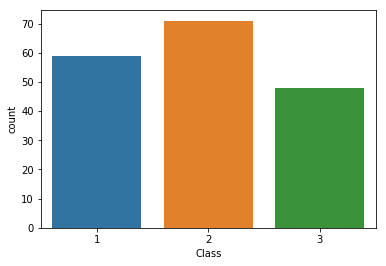

In [7]:
# checking the count of the target variable
sns.countplot(data['Class'])
plt.show()

***1.	Standardize the d-dimensional dataset.***

In [8]:
x = data.drop(['Class'], axis=1)
y = data['Class']

sc = StandardScaler()
x_std = sc.fit_transform(x)

C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DEBASHIS\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


***2.	Construct the covariance matrix.***

In [9]:
covariance_matrix = np.cov(x_std.T)

eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]


***3.	Decompose the covariance matrix into its eigenvectors and eigenvalues.***


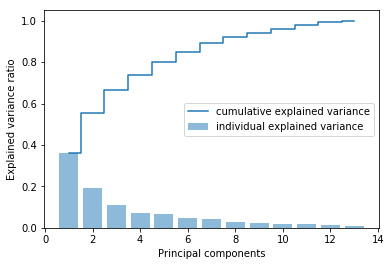

In [10]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

***4.	Select k eigenvectors that correspond to the k largest eigenvalues,  where k is the dimensionality of the new feature subspace ( k≤d ).***

In [11]:
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i])
for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(4.732436977583593,
  array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
         -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
         -0.29671456, -0.37616741, -0.28675223])),
 (2.511080929645122,
  array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
          0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
         -0.27923515, -0.16449619,  0.36490283])),
 (1.4542418678464688,
  array([ 0.20738262, -0.08901289, -0.6262239 , -0.61208035, -0.13075693,
         -0.14617896, -0.1506819 , -0.17036816, -0.14945431,  0.13730621,
         -0.08522192, -0.16600459,  0.12674592])),
 (0.9241658668248742,
  array([-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
          0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
         -0.42777141,  0.18412074, -0.23207086])),
 (0.8580486765371106,
  array([-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
         -0.14931841, 

***5.	Construct a projection matrix W from the "top" k eigenvectors.***

In [12]:
w= np.hstack((eigen_pairs[0][1][:, np.newaxis],
eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[-0.1443294   0.48365155]
 [ 0.24518758  0.22493093]
 [ 0.00205106  0.31606881]
 [ 0.23932041 -0.0105905 ]
 [-0.14199204  0.299634  ]
 [-0.39466085  0.06503951]
 [-0.4229343  -0.00335981]
 [ 0.2985331   0.02877949]
 [-0.31342949  0.03930172]
 [ 0.0886167   0.52999567]
 [-0.29671456 -0.27923515]
 [-0.37616741 -0.16449619]
 [-0.28675223  0.36490283]]


***6.	Transform the d-dimensional input dataset x using the projection matrix W to obtain the new k-dimensional feature subspace***

In [13]:
x_pca = x_std.dot(w)

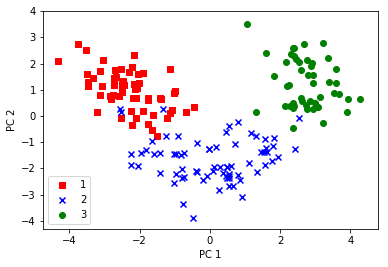

In [14]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(x_pca[y==l, 0], x_pca[y==l, 1],
            c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()